In [1]:
import warnings

import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg

warnings.filterwarnings("ignore")

In [2]:
# set seed to make the results fully reproducible
seed: int = sum(map(ord, "stan_linreg_1"))
rng: np.random.Generator = np.random.default_rng(seed=seed)

az.style.use("arviz-darkgrid")
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

%config InlineBackend.figure_format = "retina"

In [3]:
data = bmb.load_data("sleepstudy")
data.head()

Reaction  Days  Subject
0  249.5600     0      308
1  258.7047     1      308
2  250.8006     2      308
3  321.4398     3      308
4  356.8519     4      308

In [4]:
data = data[data['Days'].isin([0, 1]) == False]
data.head()

Reaction  Days  Subject
2  250.8006     2      308
3  321.4398     3      308
4  356.8519     4      308
5  414.6901     5      308
6  382.2038     6      308

In [5]:
def plot_data(data):
    fig, axes = plt.subplots(3, 6, sharey=True, sharex=True, dpi=100, constrained_layout=True)
    fig.subplots_adjust(left=0.075, right=0.975, bottom=0.075, top=0.925, wspace=0.03)

    axes_flat = axes.ravel()

    for i, subject in enumerate(data["Subject"].unique()):
        ax = axes_flat[i]
        idx = data.index[data["Subject"] == subject].tolist()
        days = data.loc[idx, "Days"].values
        reaction = data.loc[idx, "Reaction"].values

        # Plot observed data points
        ax.scatter(days, reaction, color="C0", ec="black", alpha=0.7)

        # Add a title
        ax.set_title(f"Subject: {subject}", fontsize=9)

    # Remove axis labels for individual plots
    for ax in axes_flat:
        ax.set_xlabel('')
        ax.set_ylabel('')

    # Set x-axis ticks for the last row
    for ax in axes[-1]:
        ax.xaxis.set_ticks([0, 2, 4, 6, 8])

    return axes

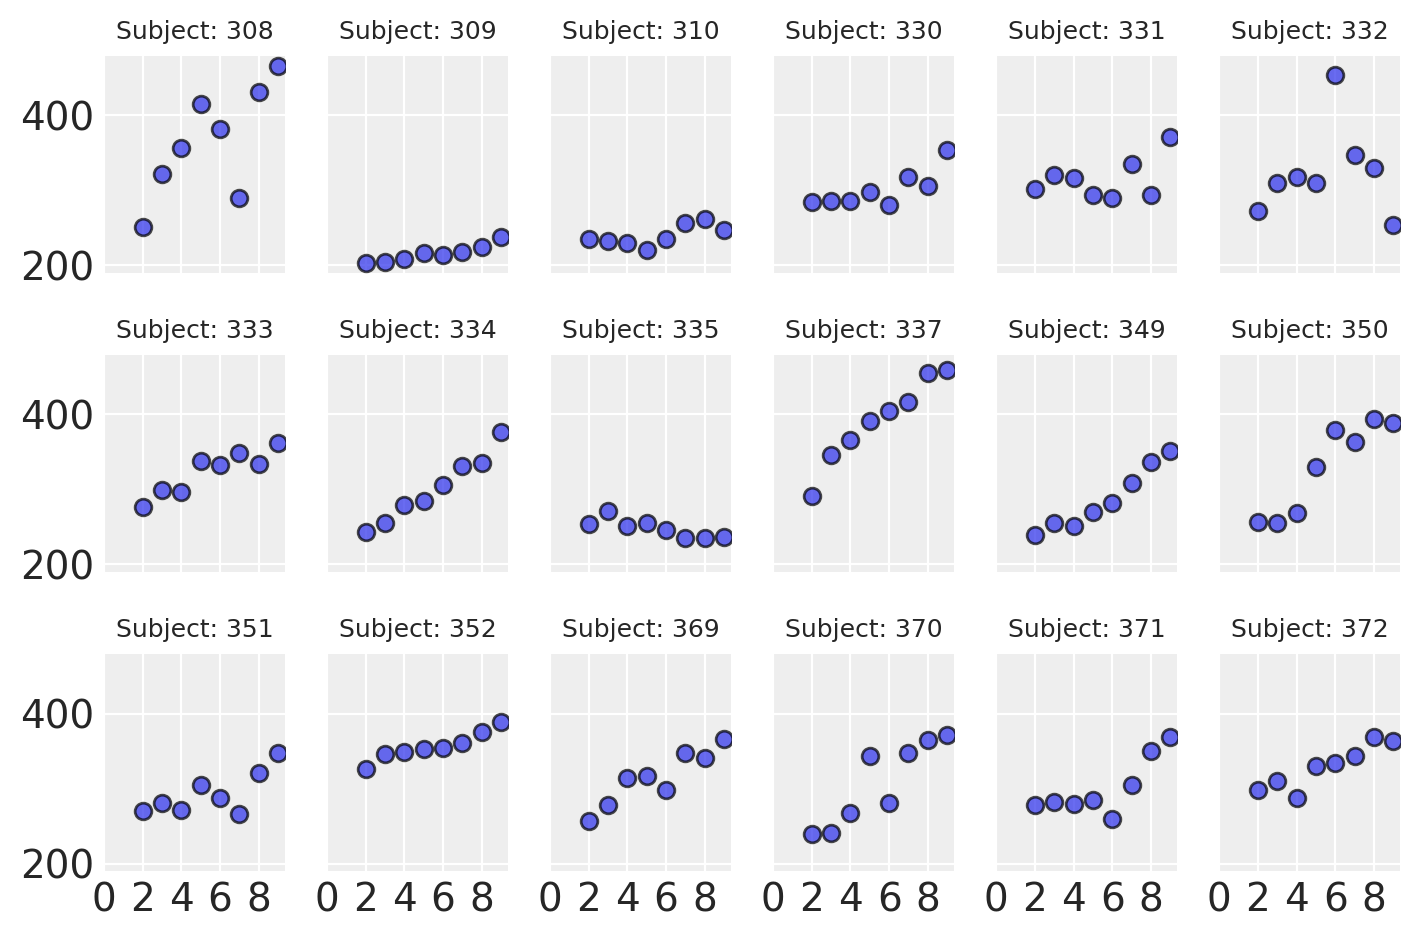

In [6]:
plot_data(data)
plt.tight_layout()

In [7]:
model_pooling = bmb.Model("Reaction ~ 1 + Days", data)

In [8]:
results_pooling = model_pooling.fit(nuts_sampler="numpyro", idata_kwargs={"log_likelihood": True})

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

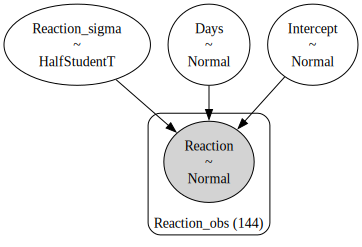

In [9]:
model_pooling.build()
model_pooling.graph()

In [10]:
az.summary(results_pooling, round_to=2)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Days             11.45   1.86    7.94    14.79       0.03     0.02   4038.37   
Intercept       244.89  11.03  223.95   264.80       0.18     0.12   3907.94   
Reaction_sigma   51.19   3.06   45.35    56.68       0.05     0.04   3582.99   

                ess_tail  r_hat  
Days             2838.87    1.0  
Intercept        2915.86    1.0  
Reaction_sigma   2853.44    1.0

In [11]:
model_no_pooling = bmb.Model("Reaction ~ Days * C(Subject)", data=data)
results_no_pooling = model_no_pooling.fit(nuts_sampler="numpyro", idata_kwargs={"log_likelihood": True})

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


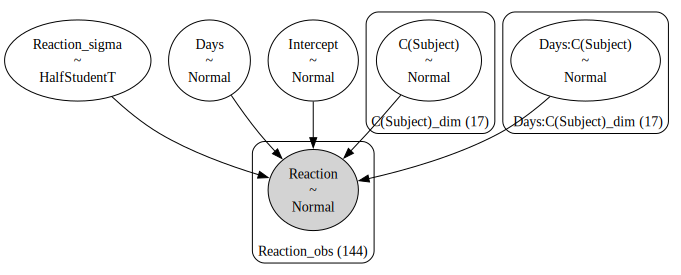

In [12]:
model_no_pooling.build()
model_no_pooling.graph()

In [13]:
az.summary(results_no_pooling, round_to=2)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
C(Subject)[309]       -53.93  32.95 -114.91     8.00       1.39     1.01   
C(Subject)[310]       -26.85  32.86  -84.27    38.46       1.38     0.99   
C(Subject)[330]        11.65  32.32  -52.18    71.64       1.41     1.00   
C(Subject)[331]        43.24  33.18  -18.74   106.98       1.33     0.94   
C(Subject)[332]        66.11  33.17    1.69   124.92       1.47     1.04   
C(Subject)[333]        18.55  32.49  -42.24    77.98       1.36     0.96   
C(Subject)[334]       -43.34  33.46 -108.05    16.63       1.35     0.96   
C(Subject)[335]        25.78  33.07  -36.09    88.35       1.34     0.95   
C(Subject)[337]        22.51  32.95  -41.23    83.47       1.37     0.97   
C(Subject)[349]       -48.82  33.25 -108.84    15.98       1.30     0.92   
C(Subject)[350]       -44.14  33.94 -107.23    19.95       1.44     1.02   
C(Subject)[351]         1.45  32.96  -61.16    62.61       1.41     1.00   
C(Subject)[352]        71.13  32.72    9.77   133.08       1.40     0.99   
C(Subject)[369]        -6.05  32.71  -69.11    51.76       1.35     0.96   
C(Subject)[370]       -51.56  32.39 -109.38    12.96       1.34     0.97   
C(Subject)[371]       -11.74  32.60  -76.90    45.01       1.37     0.97   
C(Subject)[372]        22.88  33.00  -37.93    83.18       1.40     0.99   
Days                   21.56   3.87   14.20    28.71       0.22     0.15   
Days:C(Subject)[309]  -17.22   5.60  -27.35    -6.24       0.24     0.17   
Days:C(Subject)[310]  -17.73   5.54  -28.52    -7.94       0.23     0.16   
Days:C(Subject)[330]  -13.51   5.43  -23.79    -3.24       0.24     0.17   
Days:C(Subject)[331]  -16.71   5.60  -27.26    -6.26       0.23     0.16   
Days:C(Subject)[332]  -19.22   5.55  -29.66    -8.63       0.25     0.17   
Days:C(Subject)[333]  -10.75   5.49  -21.05    -0.70       0.23     0.16   
Days:C(Subject)[334]   -3.49   5.64  -14.22     7.11       0.23     0.16   
Days:C(Subject)[335]  -25.71   5.55  -35.96   -15.01       0.22     0.16   
Days:C(Subject)[337]    0.90   5.50   -9.02    11.65       0.23     0.16   
Days:C(Subject)[349]   -5.16   5.57  -15.66     5.63       0.21     0.15   
Days:C(Subject)[350]    1.74   5.68   -8.47    12.58       0.24     0.17   
Days:C(Subject)[351]  -13.01   5.59  -23.48    -2.42       0.24     0.17   
Days:C(Subject)[352]  -14.25   5.53  -24.17    -3.52       0.23     0.17   
Days:C(Subject)[369]   -7.84   5.54  -17.97     2.33       0.23     0.16   
Days:C(Subject)[370]   -0.95   5.49  -11.45     9.15       0.23     0.16   
Days:C(Subject)[371]   -9.28   5.57  -19.96     1.05       0.23     0.17   
Days:C(Subject)[372]  -10.40   5.58  -20.77    -0.26       0.24     0.17   
Intercept             245.37  23.08  202.15   288.57       1.27     0.91   
Reaction_sigma         25.79   1.77   22.60    29.18       0.03     0.02   

                      ess_bulk  ess_tail  r_hat  
C(Subject)[309]         559.52   1090.14   1.01  
C(Subject)[310]         562.50   1487.87   1.00  
C(Subject)[330]         526.81    786.88   1.01  
C(Subject)[331]         616.51   1509.45   1.00  
C(Subject)[332]         513.40   1410.24   1.01  
C(Subject)[333]         574.51   1186.35   1.01  
C(Subject)[334]         607.54   1153.28   1.00  
C(Subject)[335]         614.43   1357.84   1.01  
C(Subject)[337]         583.85   1119.92   1.01  
C(Subject)[349]         657.73   1237.12   1.00  
C(Subject)[350]         553.25   1173.04   1.00  
C(Subject)[351]         543.26    976.39   1.00  
C(Subject)[352]         550.39   1341.33   1.00  
C(Subject)[369]         583.61    928.91   1.01  
C(Subject)[370]         588.35   1138.02   1.00  
C(Subject)[371]         570.79   1487.86   1.01  
C(Subject)[372]         555.22   1413.14   1.01  
Days                    322.04    442.38   1.01  
Days:C(Subject)[309]    541.01   1236.42   1.01  
Days:C(Subject)[310]    606.27   1170.99   1.00  
Days:C(Subject)[330]    509.35    918.65   1.01  
Days:C(Subject)[331]    590.12   13

In [14]:
246.98 + -55.29

191.69

In [15]:
21.30 + -16.97

4.330000000000002

In [16]:
data_subject_309 = data[data["Subject"] == 309]
data_subject_309.shape

(8, 3)

In [17]:
result = pg.linear_regression(data_subject_309["Days"], data_subject_309["Reaction"])
print(result)

       names        coef        se          T          pval        r2  \
0  Intercept  191.576970  3.723259  51.454104  3.615788e-09  0.890144   
1       Days    4.357144  0.624898   6.972569  4.325982e-04  0.890144   

     adj_r2    CI[2.5%]   CI[97.5%]  
0  0.871834  182.466483  200.687458  
1  0.871834    2.828074    5.886214  


In [18]:
model_partial_pooling = bmb.Model(
    "Reaction ~ 1 + Days + (Days | Subject)", data, categorical="Subject"
)

In [19]:
results_partial_pooling = model_partial_pooling.fit(
    nuts_sampler="numpyro", idata_kwargs={"log_likelihood": True}
)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

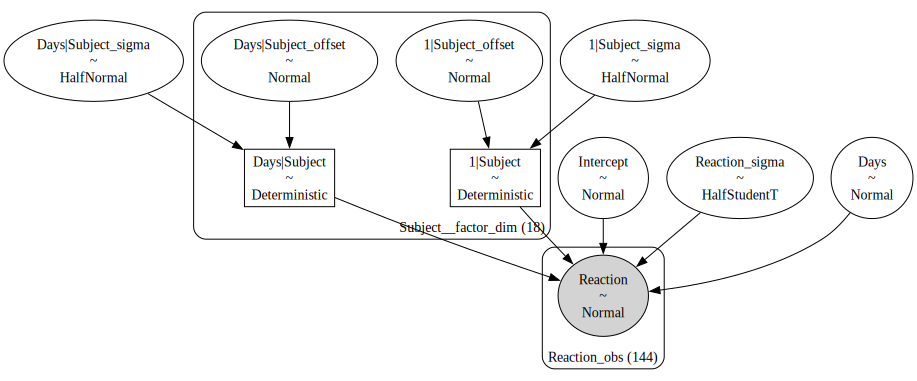

In [20]:
model_partial_pooling.build()
model_partial_pooling.graph()

In [21]:
az.summary(results_partial_pooling, round_to=2)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
1|Subject[308]       10.30  18.63  -23.72    46.68       0.30     0.25   
1|Subject[309]      -42.90  20.64  -81.98    -5.13       0.36     0.27   
1|Subject[310]      -25.73  19.27  -64.25     7.08       0.34     0.27   
1|Subject[330]        5.10  18.18  -27.73    39.94       0.29     0.26   
1|Subject[331]       22.56  19.30  -12.79    59.05       0.34     0.27   
1|Subject[332]       35.62  20.03    0.17    75.28       0.38     0.27   
1|Subject[333]       12.30  18.21  -20.57    47.58       0.29     0.24   
1|Subject[334]      -21.90  18.51  -56.91    11.82       0.33     0.25   
1|Subject[335]        1.44  19.22  -36.03    35.95       0.33     0.30   
1|Subject[337]       26.46  19.68   -8.70    62.96       0.31     0.25   
1|Subject[349]      -27.63  19.58  -63.89     8.48       0.33     0.26   
1|Subject[350]      -16.95  19.49  -54.03    18.93       0.31     0.28   
1|Subject[351]       -1.39  18.33  -36.45    32.68       0.31     0.28   
1|Subject[352]       43.86  20.01    7.53    82.54       0.35     0.26   
1|Subject[369]       -1.36  18.58  -37.58    31.75       0.31     0.27   
1|Subject[370]      -25.03  19.39  -62.50     9.99       0.35     0.28   
1|Subject[371]       -6.67  18.32  -39.25    28.81       0.30     0.27   
1|Subject[372]       15.53  18.88  -21.85    48.98       0.30     0.26   
1|Subject_sigma      31.82   9.31   15.19    49.71       0.25     0.18   
Days                 11.41   1.90    7.74    14.73       0.04     0.03   
Days|Subject[308]     8.18   3.33    2.39    14.74       0.06     0.04   
Days|Subject[309]    -8.21   3.51  -14.62    -1.50       0.06     0.04   
Days|Subject[310]    -7.28   3.38  -13.90    -1.31       0.06     0.04   
Days|Subject[330]    -2.14   3.24   -8.30     3.91       0.06     0.04   
Days|Subject[331]    -3.11   3.38   -9.43     3.05       0.06     0.05   
Days|Subject[332]    -4.05   3.48  -11.05     2.18       0.07     0.05   
Days|Subject[333]     0.45   3.24   -5.83     6.31       0.05     0.05   
Days|Subject[334]     3.24   3.28   -2.90     9.27       0.06     0.04   
Days|Subject[335]   -11.15   3.43  -17.43    -4.55       0.06     0.04   
Days|Subject[337]     9.96   3.53    3.11    16.32       0.06     0.05   
Days|Subject[349]     1.62   3.38   -4.57     8.06       0.06     0.05   
Days|Subject[350]     7.30   3.42    0.72    13.57       0.06     0.05   
Days|Subject[351]    -2.26   3.30   -8.41     3.90       0.06     0.05   
Days|Subject[352]     0.21   3.52   -6.72     6.58       0.07     0.05   
Days|Subject[369]     1.56   3.26   -4.47     7.86       0.06     0.04   
Days|Subject[370]     4.85   3.38   -1.42    10.93       0.06     0.05   
Days|Subject[371]     0.12   3.27   -6.05     6.29       0.05     0.04   
Days|Subject[372]     0.86   3.38   -5.50     7.16       0.06     0.05   
Days|Subject_sigma    6.88   1.68    4.10    10.05       0.04     0.03   
Intercept           244.99  10.05  225.22   262.58       0.23     0.16   
Reaction_sigma       26.02   1.77   22.71    29.36       0.03     0.02   

                    ess_bulk  ess_tail  r_hat  
1|Subject[308]       4016.12   3084.96    1.0  
1|Subject[309]       3309.63   2812.67    1.0  
1|Subject[310]       3277.97   3119.89    1.0  
1|Subject[330]       3953.31   3043.03    1.0  
1|Subject[331]       3343.98   2792.03    1.0  
1|Subject[332]       2801.47   2863.21    1.0  
1|Subject[333]       4036.79   3094.61    1.0  
1|Subject[334]       3145.55   3114.19    1.0  
1|Subject[335]       3330.64   2449.93    1.0  
1|Subject[337]       3941.04   3080.95    1.0  
1|Subject[349]       3449.44   2721.36    1.0  
1|Subject[350]       3884.45   3122.27    1.0  
1|Subject[351]       3548.57   2987.46    1.0  
1|Subject[352]       3215.03   3169.69    1.0  
1|Subject[369]       3551.01   2964.76    1.0  
1|Subject[370]       3054.48   2930.81    1.0  
1|Subject[371]       3757.77   2967.50    1.0  
1|Subject[372]       3998.95   3043.40    1.0  
1

In [22]:
245.24 + -42.22

203.02

In [23]:
11.34 + -8.27

3.0700000000000003

In [24]:
az.summary(results_partial_pooling, var_names=["Intercept", "Days"], round_to=2)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Intercept  244.99  10.05  225.22   262.58       0.23     0.16   2034.41   
Days        11.41   1.90    7.74    14.73       0.04     0.03   1855.73   

           ess_tail  r_hat  
Intercept   2703.14    1.0  
Days        2064.91    1.0

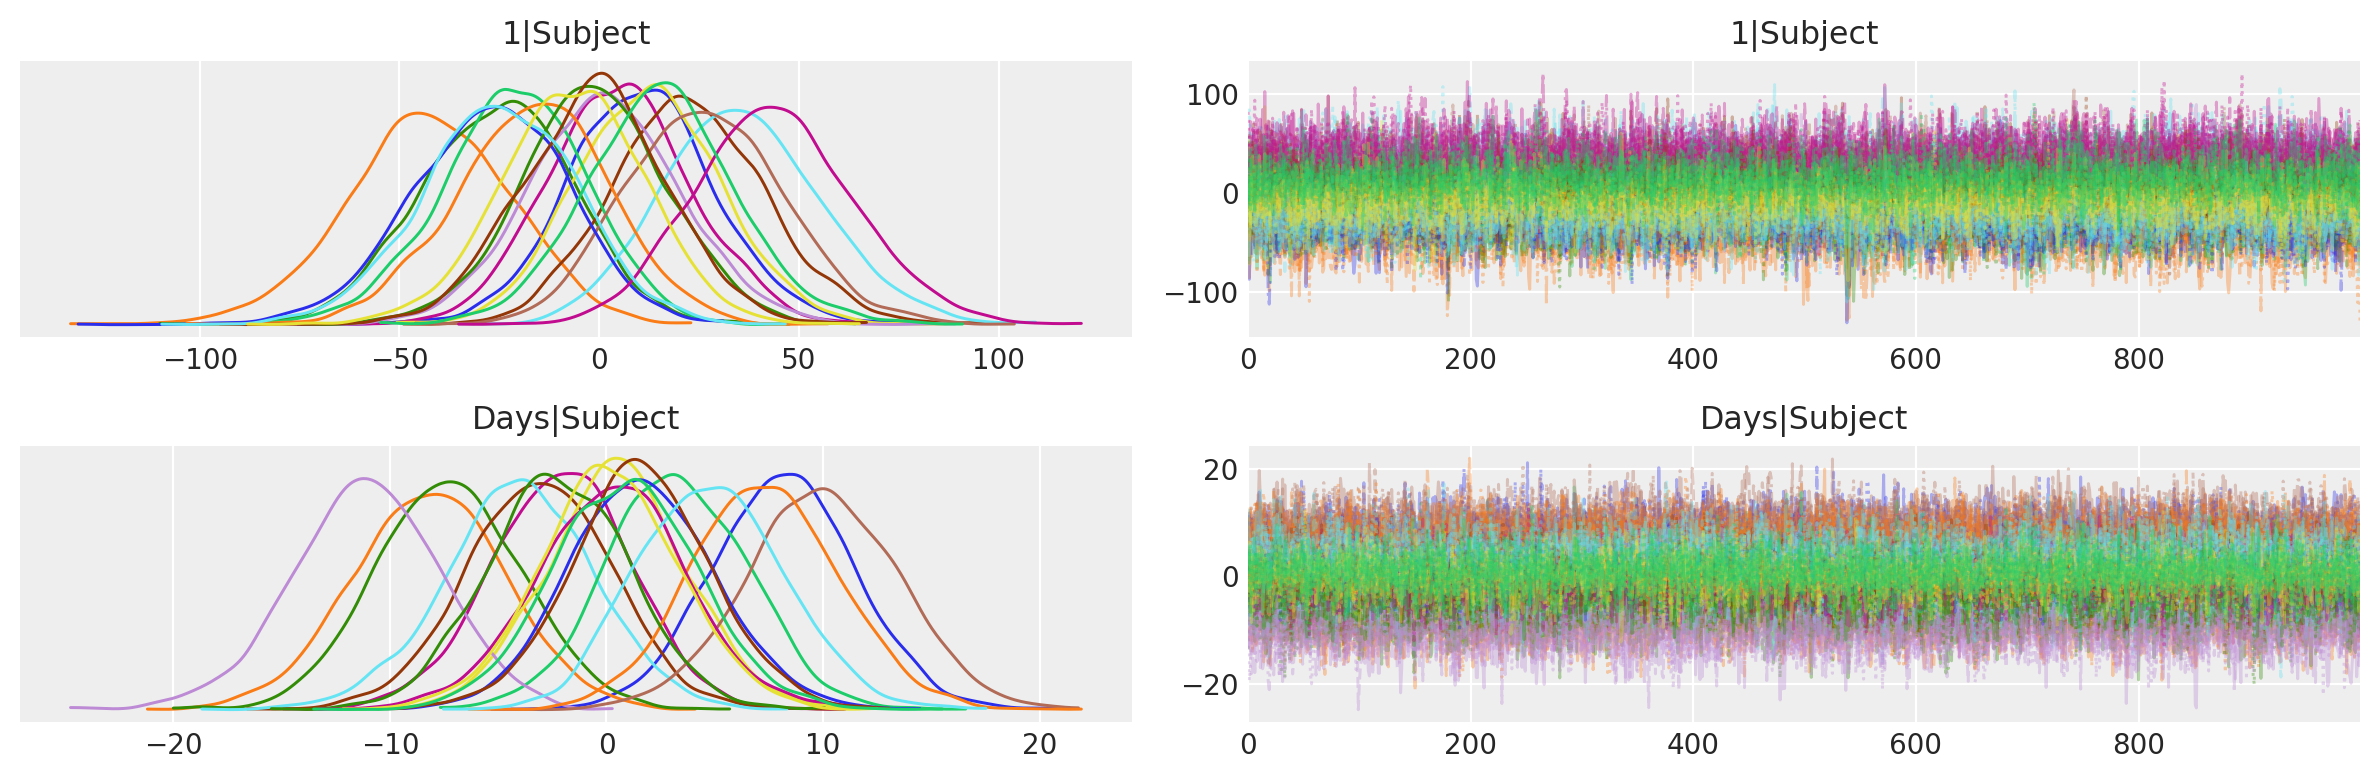

In [25]:
az.plot_trace(
    results_partial_pooling, combined=True, var_names=["1|Subject", "Days|Subject"]
)
plt.tight_layout()

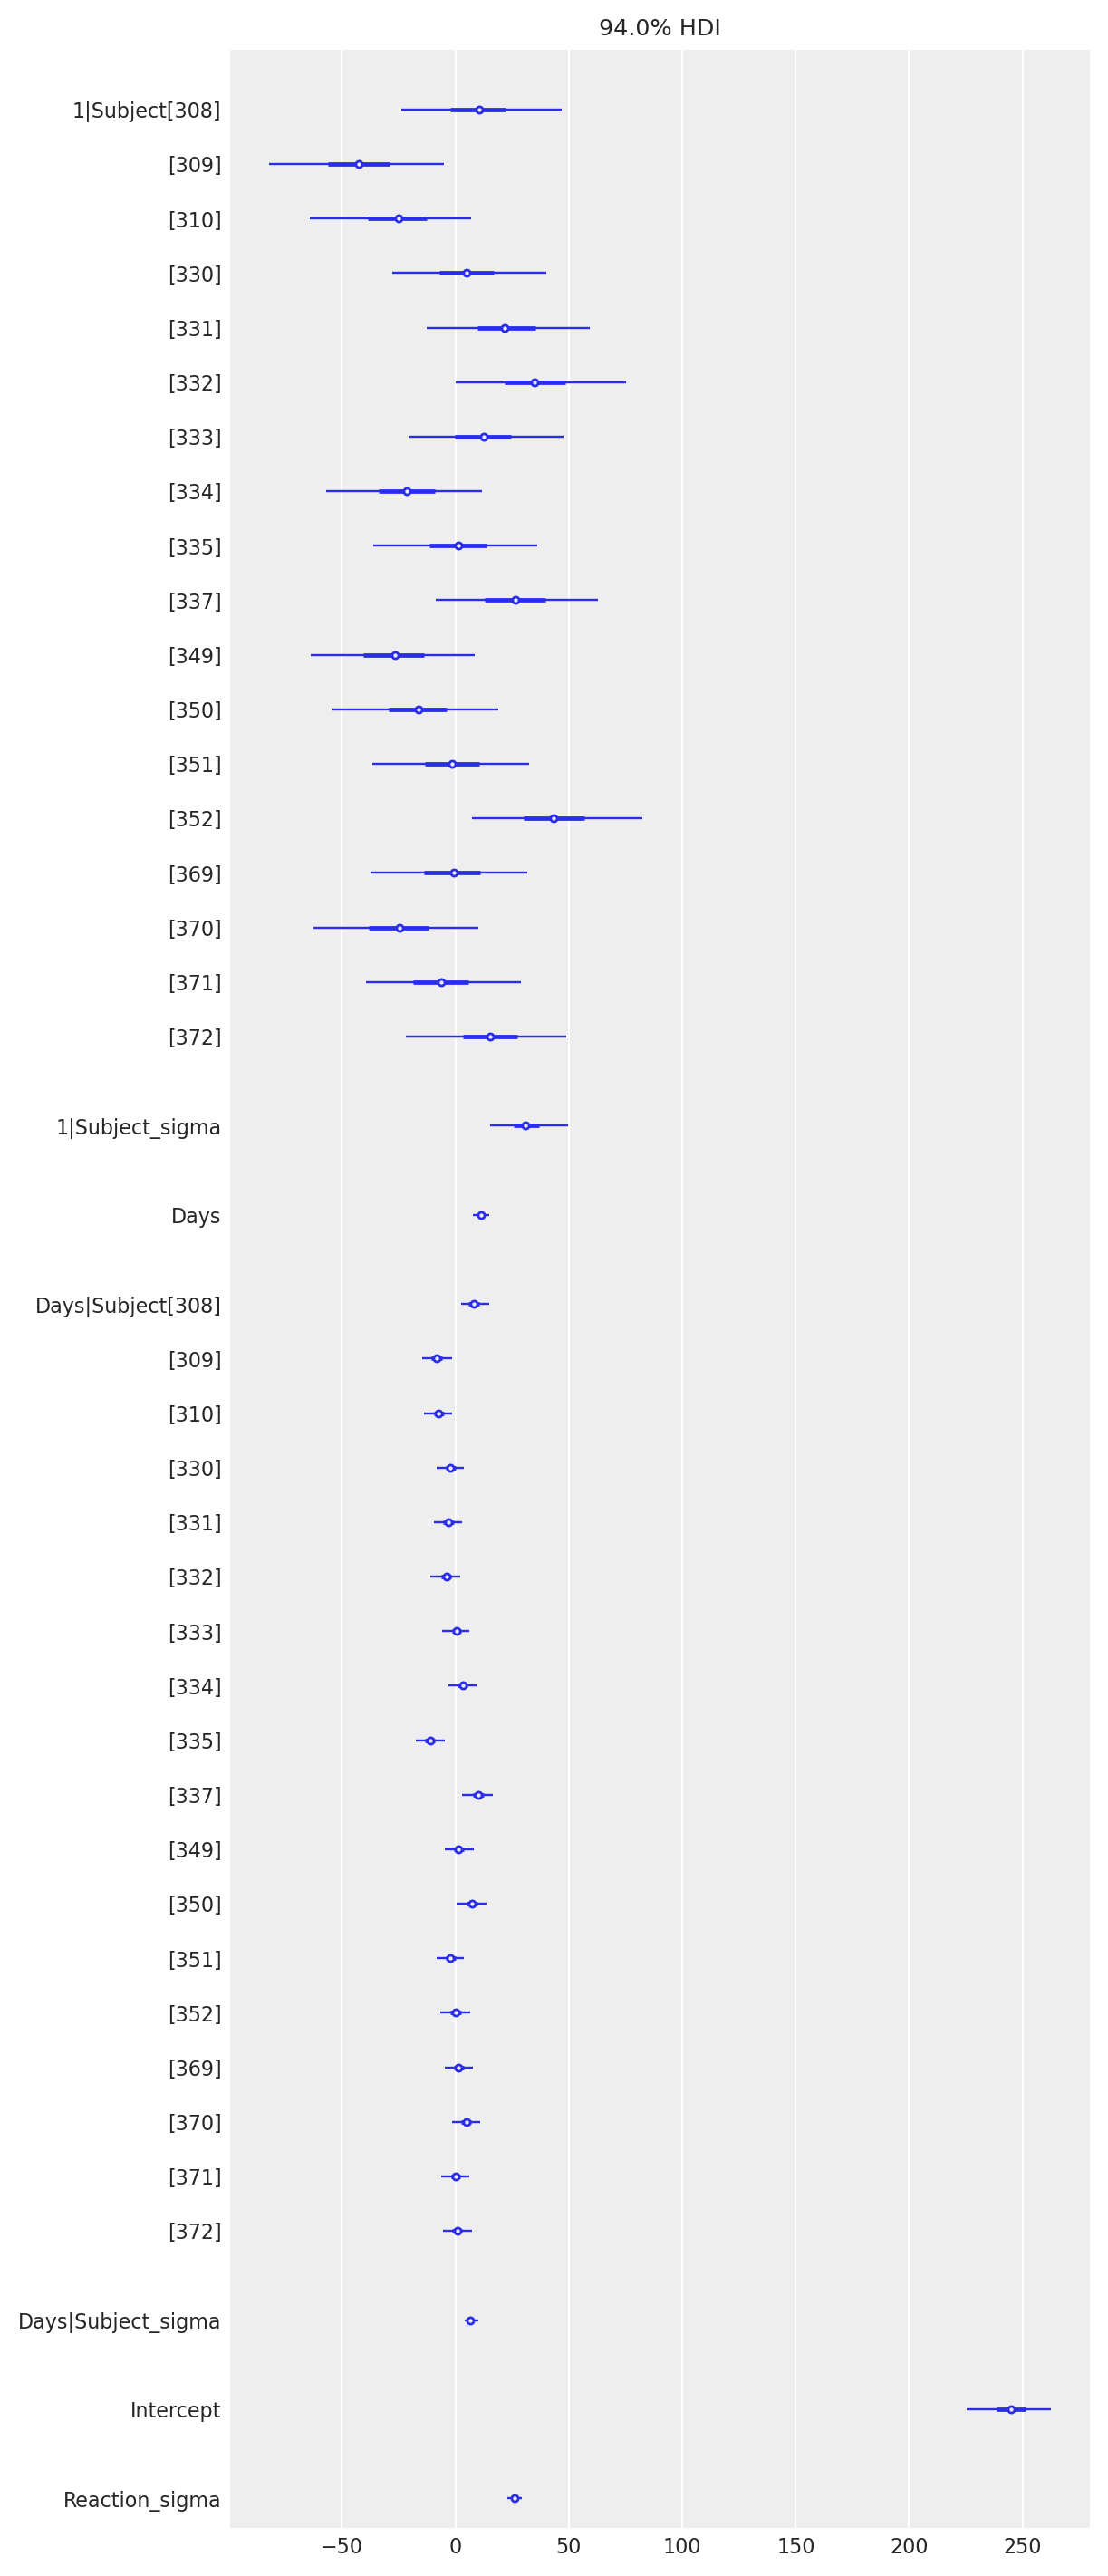

In [26]:
az.plot_forest(data=results_partial_pooling, r_hat=False, combined=True, textsize=8);

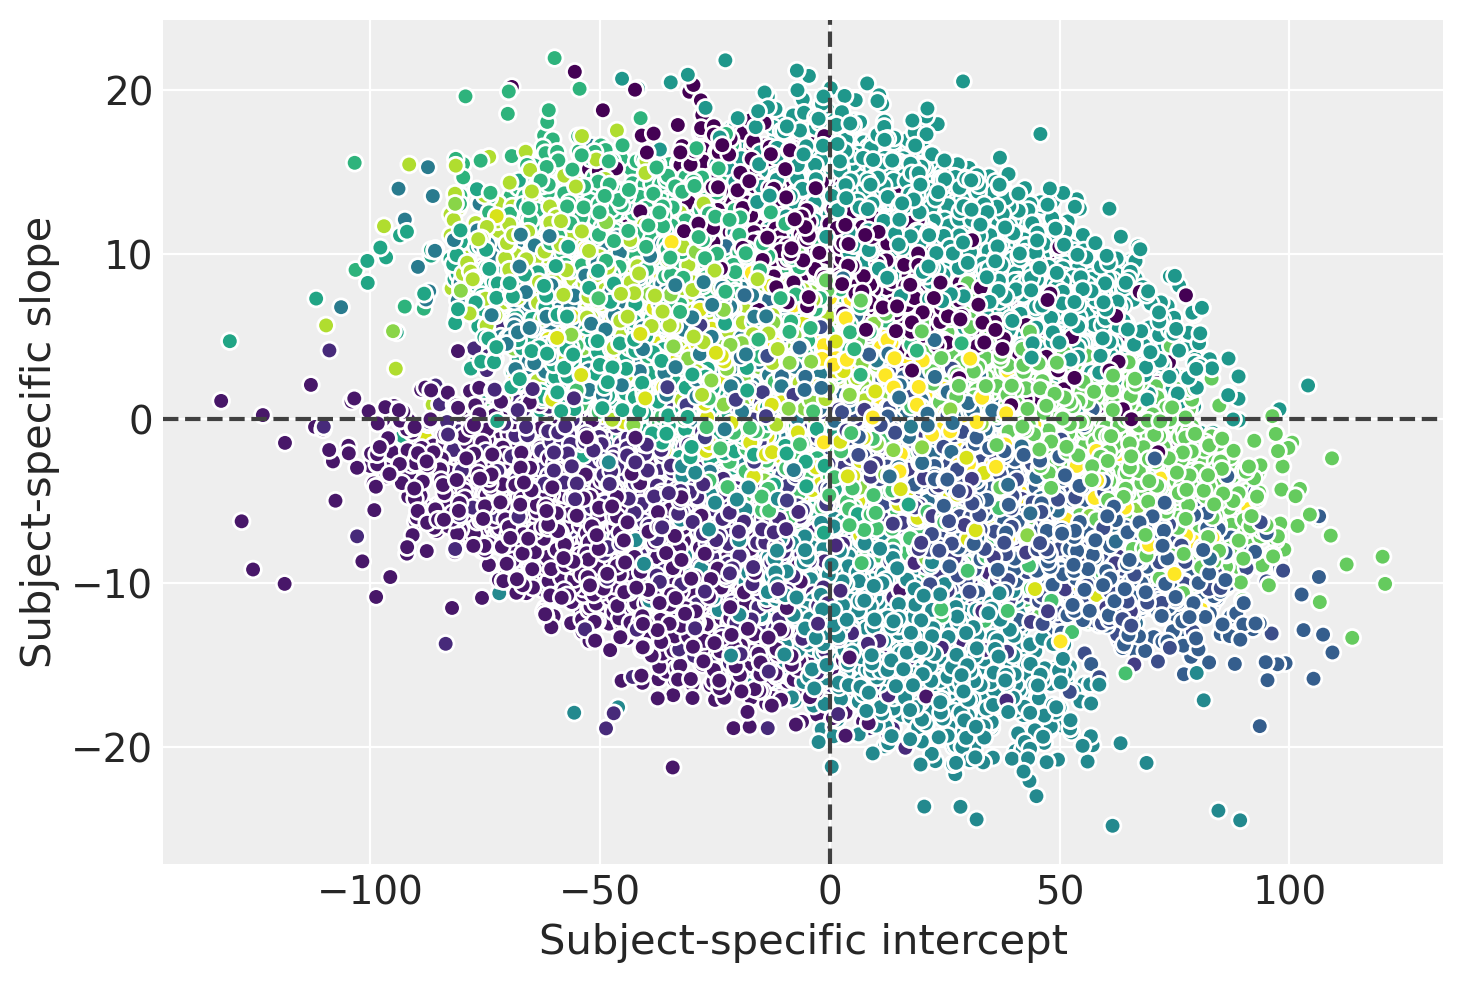

In [27]:
#  extract a subsample from the posterior and stack the chain and draw dims
posterior = az.extract(results_partial_pooling, num_samples=500)

_, ax = plt.subplots()

results_partial_pooling.posterior.plot.scatter(
    x="1|Subject", y="Days|Subject",
    hue="Subject__factor_dim",
    add_colorbar=False,
    add_legend=False,
    edgecolors=None,
)

ax.axhline(c="0.25", ls="--")
ax.axvline(c="0.25", ls="--")
ax.set_xlabel("Subject-specific intercept")
ax.set_ylabel("Subject-specific slope");

In [28]:
models_dict = {
    "pooling": results_pooling,
    "no_pooling": results_no_pooling,
    "partial_pooling": results_partial_pooling
}
df_compare = az.compare(models_dict)
df_compare

rank    elpd_loo      p_loo  elpd_diff        weight  \
partial_pooling     0 -691.547706  30.299753   0.000000  9.503878e-01   
no_pooling          1 -694.855376  36.372203   3.307670  6.001324e-17   
pooling             2 -772.190908   3.062238  80.643201  4.961224e-02   

                        se        dse  warning scale  
partial_pooling  21.319956   0.000000     True   log  
no_pooling       21.827659   3.169396     True   log  
pooling           9.011391  19.982860    False   log

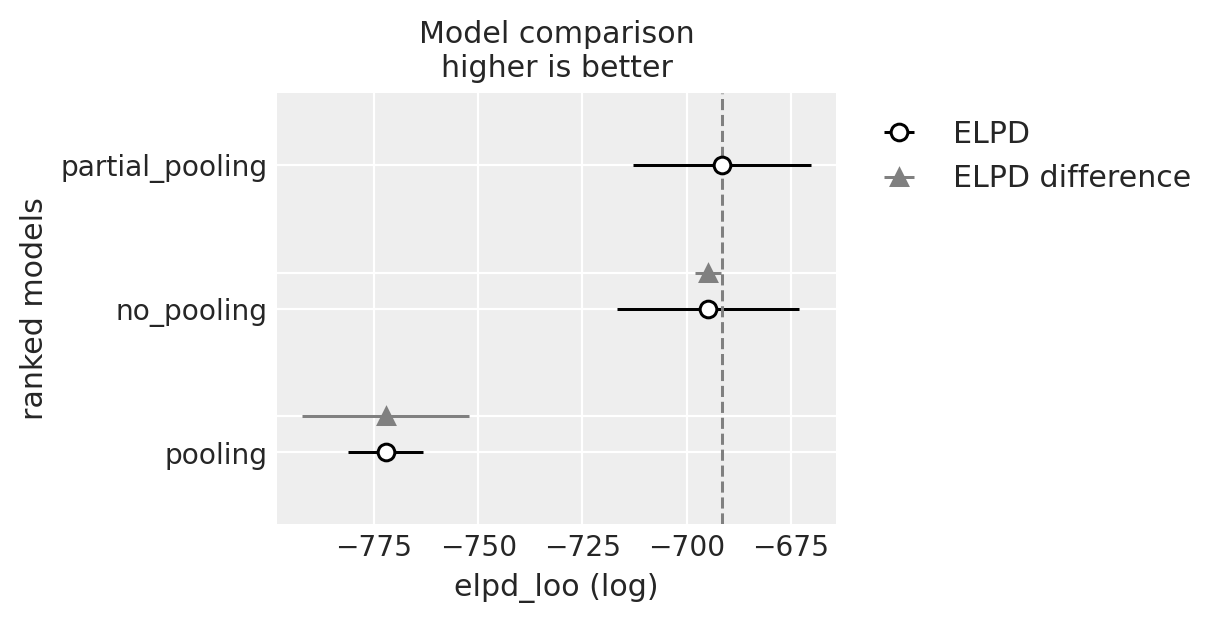

In [29]:
az.plot_compare(df_compare, insample_dev=False);

In [30]:
model_pooling_fitted = model_pooling.fit(idata_kwargs={"log_likelihood": True})
model_pooling.predict(model_pooling_fitted, kind="pps")

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [Reaction_sigma, Intercept, Days]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


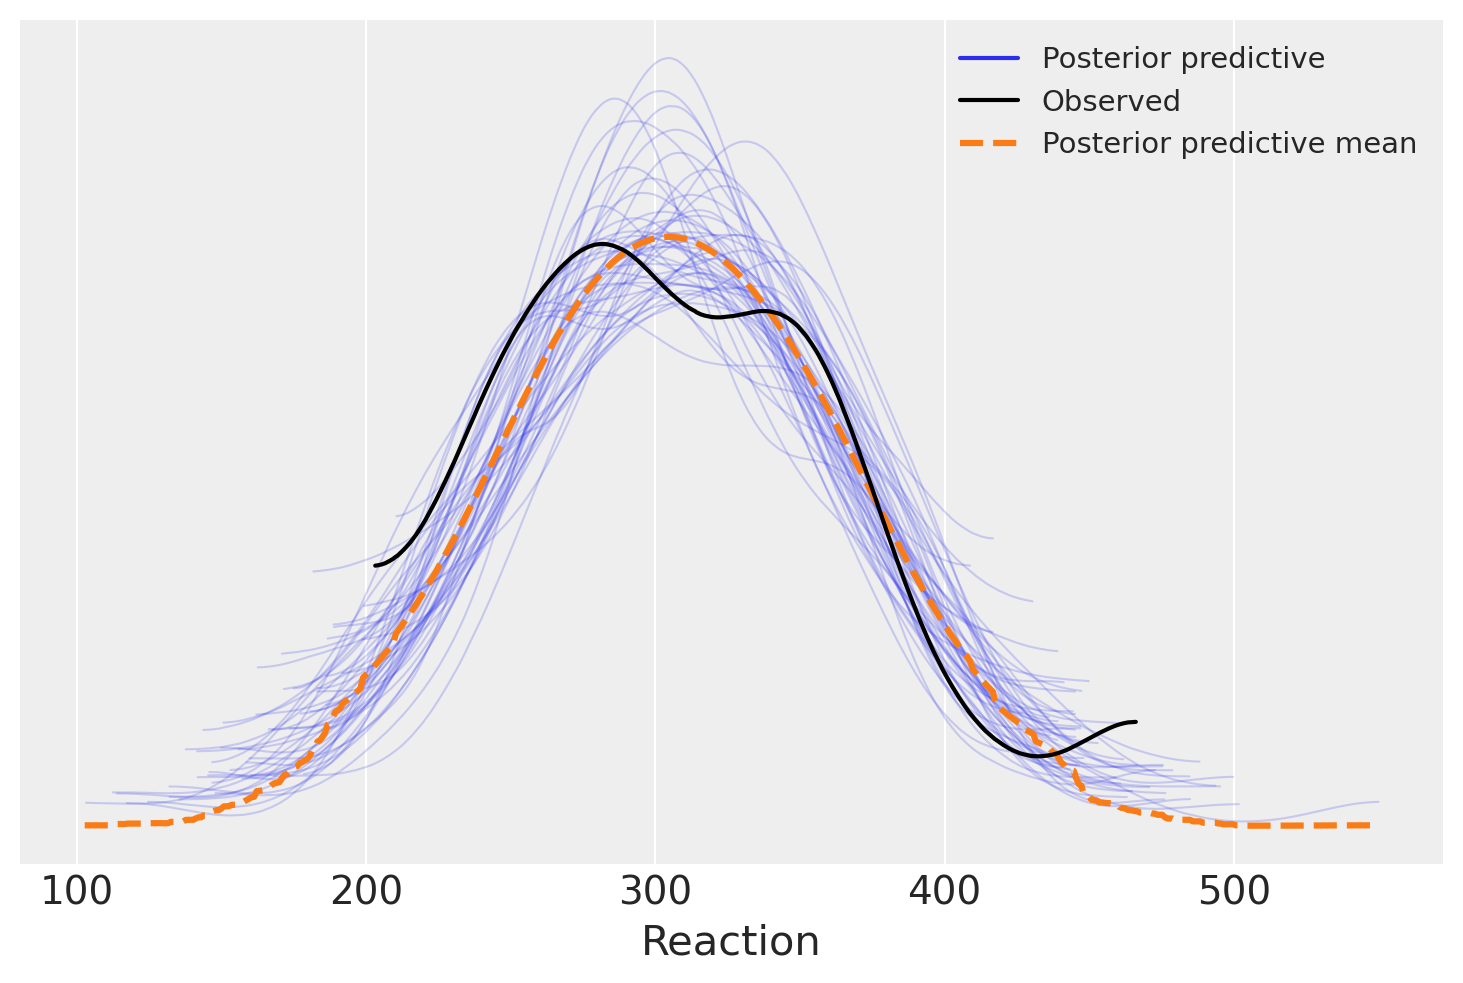

In [31]:
az.plot_ppc(model_pooling_fitted, num_pp_samples=50);

In [32]:
model_no_pooling_fitted = model_no_pooling.fit(idata_kwargs={"log_likelihood": True})
model_no_pooling.predict(model_no_pooling_fitted, kind="pps");

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [Reaction_sigma, Intercept, Days, C(Subject), Days:C(Subject)]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


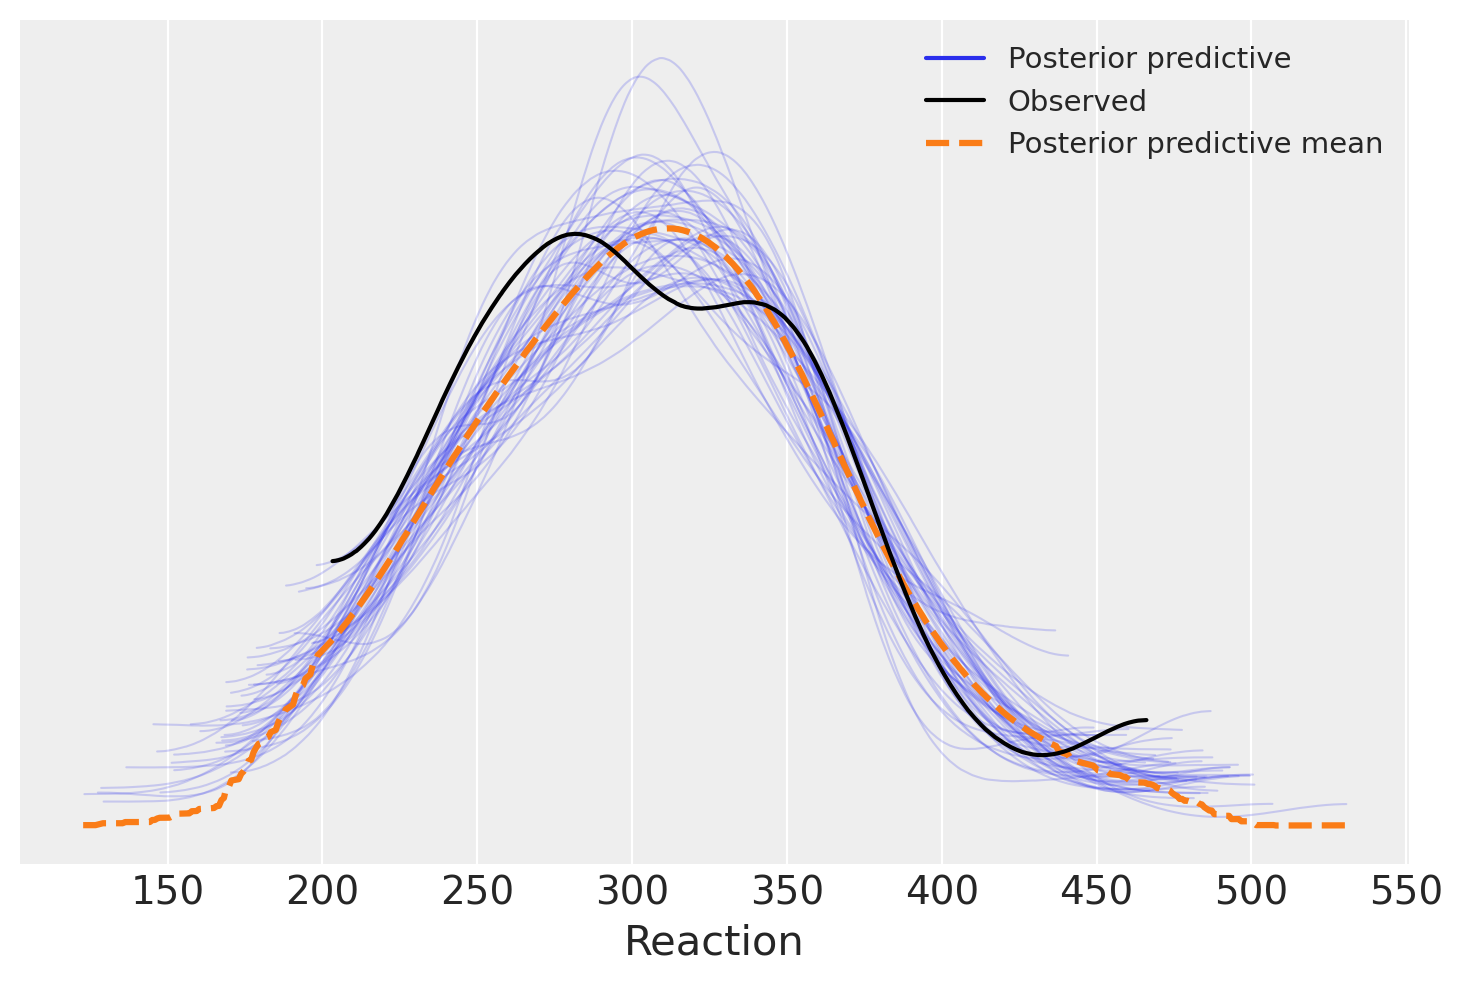

In [33]:
az.plot_ppc(model_no_pooling_fitted, num_pp_samples=50);

In [34]:
model_partial_pooling_fitted = model_partial_pooling.fit(idata_kwargs={"log_likelihood": True})
model_partial_pooling.predict(model_partial_pooling_fitted, kind="pps");

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [Reaction_sigma, Intercept, Days, 1|Subject_sigma, 1|Subject_offset, Days|Subject_sigma, Days|Subject_offset]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.


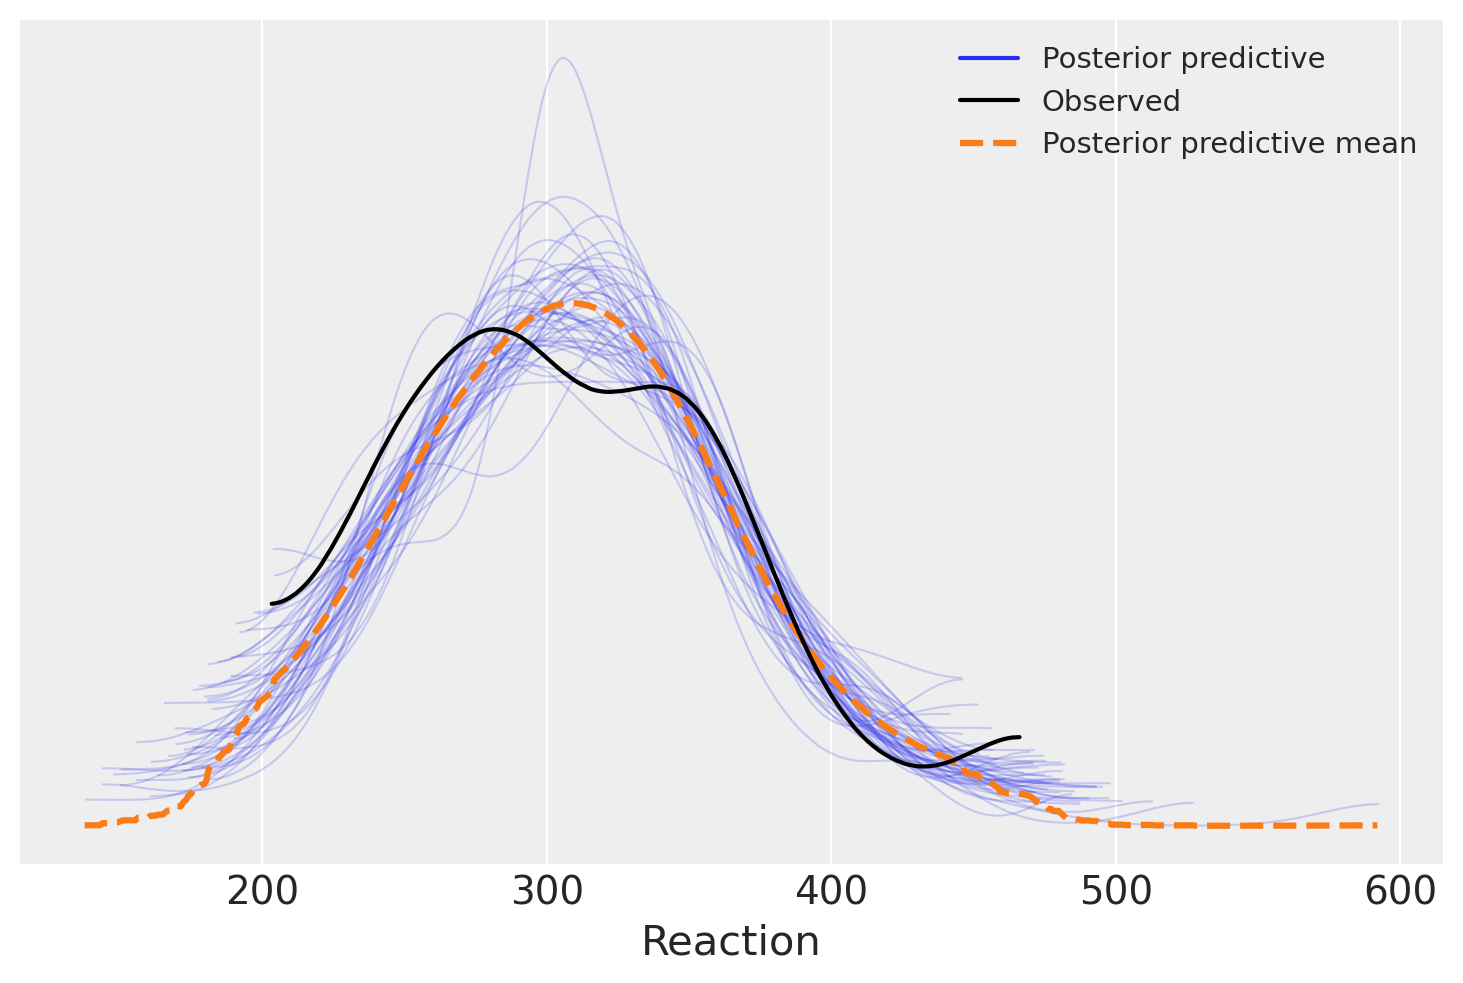

In [35]:
az.plot_ppc(model_partial_pooling_fitted, num_pp_samples=50);

In [36]:
%load_ext watermark
%watermark -n -u -v -iv -w -m 

Last updated: Sun Jun 16 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.25.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

bambi     : 0.13.0
arviz     : 0.18.0
matplotlib: 3.8.4
numpy     : 1.26.4
pingouin  : 0.5.4

Watermark: 2.4.3

